<a href="https://colab.research.google.com/github/nguyenthanhdat20130013/Machine-Learning/blob/main/Lab_7_20130013_NguyenThanhDat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [44]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster import hierarchy

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
ds1 = datasets.load_iris()
X = ds1['data']
y = ds1['target']
clf = svm.SVC(kernel='sigmoid', random_state=0)
print('Building model using cross_validate')
print('Accuracy: ')
scores = cross_validate(clf, X,y, scoring='accuracy', cv=10)
#print(sorted(scores))
print(np.mean(scores['test_score']))
print('Precision: ')
scores1 = cross_validate(clf, X,y, scoring='precision_macro', cv=10)
#print(sorted(scores1))
print(np.mean(scores1['test_score']))
print('Recall: ')
scores2 = cross_validate(clf, X,y, scoring='recall_macro', cv=10)
#print(sorted(scores2))
print(np.mean(scores2['test_score']))
print('F1: ')
scores3 = cross_validate(clf, X,y, scoring='f1_macro', cv=10)
#print(sorted(scores3))
print(np.mean(scores3['test_score']))

Building model using cross_validate
Accuracy: 
0.06666666666666668
Precision: 
0.030789950789950792
Recall: 
0.06666666666666667
F1: 
0.041984126984126985


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel='rbf', random_state=0)
scores4 = cross_val_score(model,X,y, scoring='accuracy',cv=cv)
print('Building model using cross_val_score: ')
print('Accuracy: ')
print(scores4.mean())
scores5 = cross_val_score(model,X,y, scoring='precision_macro',cv=cv)
print('Precision: ')
print(scores5.mean())
scores6 = cross_val_score(model,X,y, scoring='recall_macro',cv=cv)
print('Recall: ')
print(scores6.mean())
scores7 = cross_val_score(model,X,y, scoring='f1_macro',cv=cv)
print('F1: ')
print(scores7.mean())

Building model using cross_val_score: 
Accuracy: 
0.96
Precision: 
0.9507936507936507
Recall: 
0.9662698412698413
F1: 
0.9530336330336329


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
pca =PCA(n_components= 3)
fit = pca.fit(X)
x = fit.transform(X)
RFS = RandomForestClassifier(n_estimators=100)
scores = cross_validate(RFS, x, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9133333333333333


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier(n_estimators=100)
scores8 = cross_val_score(model, x, y , scoring='accuracy', cv=cv)
print(scores8.mean())

0.9400000000000001


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [16]:
dataset = datasets.load_digits()
X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
cluster = kmeans.predict(X)
kmeans.cluster_centers_.shape



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[2159057.2910406236, 1914619.6175501016, 1730184.7025430463, 1609624.9227834668, 1517565.0059723475, 1404986.8264647238, 1336524.3662530663, 1264984.2808872391, 1202276.482000586, 1165177.713706215]


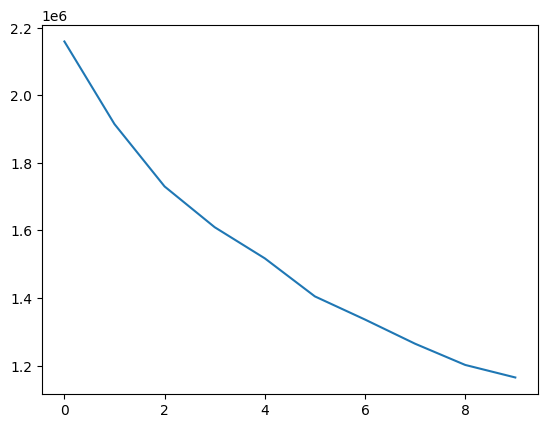

In [15]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, random_state = 0)
  kmeans.fit(X)
  clusters = kmeans.predict(X)
  kmeans.cluster_centers_.shape
  sse.append(kmeans.inertia_)
print(sse)
plt.plot(sse)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [19]:
#NOT USE CROSS VALIDATION
#Randomforest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred, average= 'macro')
recall_rfc = recall_score(y_test, y_pred, average= 'macro')
f1_rfc = f1_score(y_test, y_pred, average= 'macro')
#kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_k = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_k)
precision_knn = precision_score(y_test, y_pred_k, average = 'macro')
recall_knn = recall_score(y_test, y_pred_k, average = 'macro')
f1_knn = f1_score(y_test, y_pred_k, average = 'macro')

#Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average = 'macro')
recall_nb = recall_score(y_test, y_pred_nb, average = 'macro')
f1_nb = f1_score(y_test, y_pred_nb,  average = 'macro')

In [22]:
#USE CROSS VALIDATION.
c_rfc = RandomForestClassifier()
c_knn = KNeighborsClassifier()
c_nb = GaussianNB()
#RFC
c_rcf_a = cross_validate(c_rfc, X,y, scoring='accuracy', cv=10)
c_rcf_p = cross_validate(c_rfc, X,y, scoring='precision_macro', cv=10)
c_rcf_r = cross_validate(c_rfc, X,y, scoring='recall_macro', cv=10)
c_rcf_f = cross_validate(c_rfc, X,y, scoring='f1_macro', cv=10)
#kNN
k_rcf_a = cross_validate(c_knn, X,y, scoring='accuracy', cv=10)
k_rcf_p = cross_validate(c_knn, X,y, scoring='precision_macro', cv=10)
k_rcf_r = cross_validate(c_knn, X,y, scoring='recall_macro', cv=10)
k_rcf_f = cross_validate(c_knn, X,y, scoring='f1_macro', cv=10)
#NB
n_rcf_a = cross_validate(c_nb, X,y, scoring='accuracy', cv=10)
n_rcf_p = cross_validate(c_nb, X,y, scoring='precision_macro', cv=10)
n_rcf_r = cross_validate(c_nb, X,y, scoring='recall_macro', cv=10)
n_rcf_f = cross_validate(c_nb, X,y, scoring='f1_macro', cv=10)
#print(np.mean(c_rcf_a['test_score']))


['fit_time', 'score_time', 'test_score']


In [29]:
cols = [('Random Forest',accuracy_rfc, precision_rfc,recall_rfc, f1_rfc), 
            ('kNN',accuracy_knn, precision_knn, recall_knn, f1_knn),
        ('Naïve Bayes',accuracy_nb, precision_nb, recall_nb, f1_nb) ]
print("Not use cross validation")
df1 = pd.DataFrame(data = cols, columns = ['Algorithm','Accuracy', 'Precision', 'Recall',' f1'])
df1


Not use cross validation


,Algorithm,Accuracy,Precision,Recall,f1
0,Random Forest,0.972222,0.973626,0.974295,0.973303
1,kNN,0.988889,0.989246,0.988985,0.988934
2,Naïve Bayes,0.861111,0.882761,0.854605,0.859159


In [30]:
colss = [('Random Forest',np.mean(c_rcf_a['test_score']), np.mean(c_rcf_p['test_score']),np.mean(c_rcf_r['test_score']), np.mean(c_rcf_f['test_score'])), 
            ('kNN',np.mean(k_rcf_a['test_score']), np.mean(k_rcf_p['test_score']), np.mean(k_rcf_r['test_score']), np.mean(k_rcf_f['test_score'])),
        ('Naïve Bayes',np.mean(n_rcf_a['test_score']), np.mean(n_rcf_p['test_score']), np.mean(n_rcf_r['test_score']), np.mean(n_rcf_f['test_score'])) ]
print("Not use cross validation")
df2 = pd.DataFrame(data = colss, columns = ['Algorithm','Accuracy', 'Precision', 'Recall',' f1'])
df2


Not use cross validation


,Algorithm,Accuracy,Precision,Recall,f1
0,Random Forest,0.950466,0.956549,0.947798,0.951951
1,kNN,0.971629,0.974565,0.971519,0.971551
2,Naïve Bayes,0.811390,0.848084,0.811419,0.809038


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
# Do đó, trong trường hợp này, 
# học có giám sát là cách tiếp cận tốt hơn 
# để giải quyết vấn đề nhận dạng các chữ số viết tay trong bộ dữ liệu MNIST.

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [35]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([7, 9, 4, ..., 4, 1, 4])

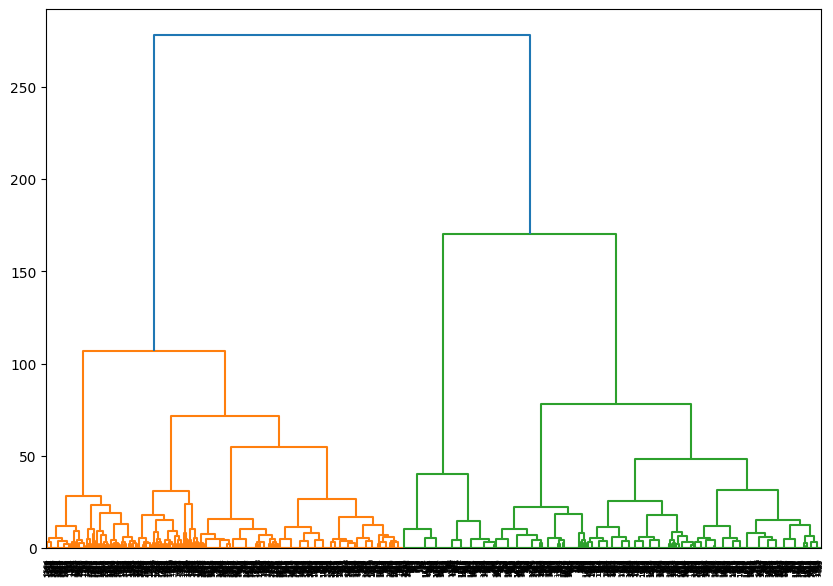

In [39]:
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X[:, 1:4], method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





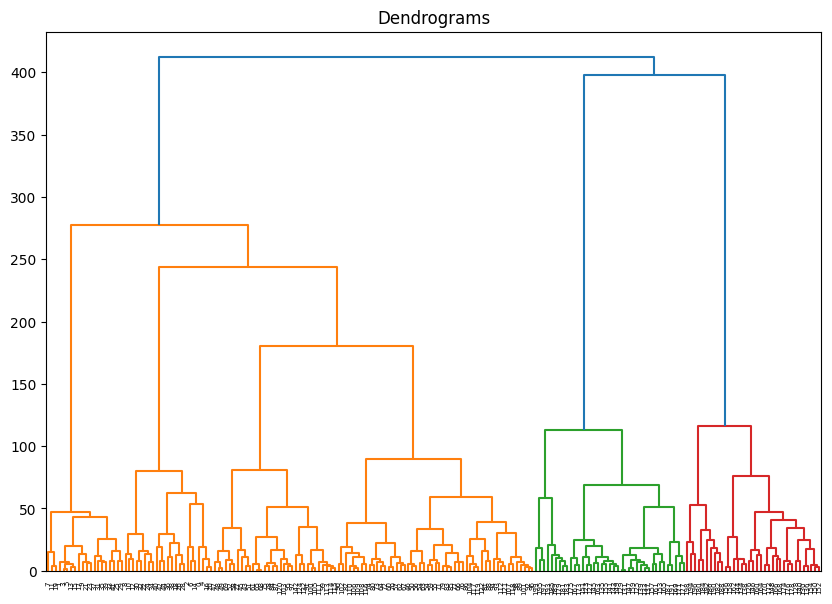

In [46]:
df3 = pd.read_csv('shopping-data.csv')
dataset = df3.drop(['CustomerID', 'Genre'], axis=1)
# Dendrograms
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = hierarchy.dendrogram(hierarchy.linkage(dataset, 'ward'))
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

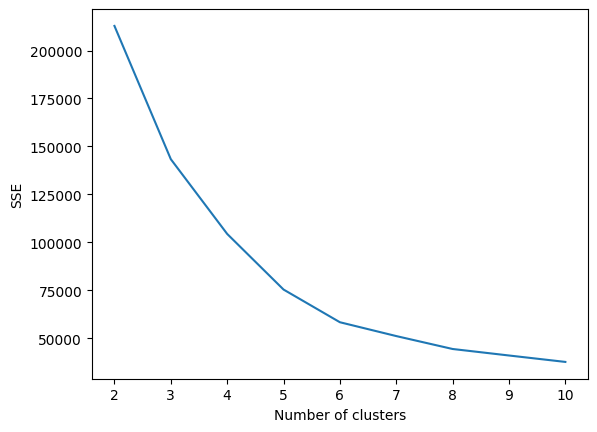

In [52]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(dataset)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

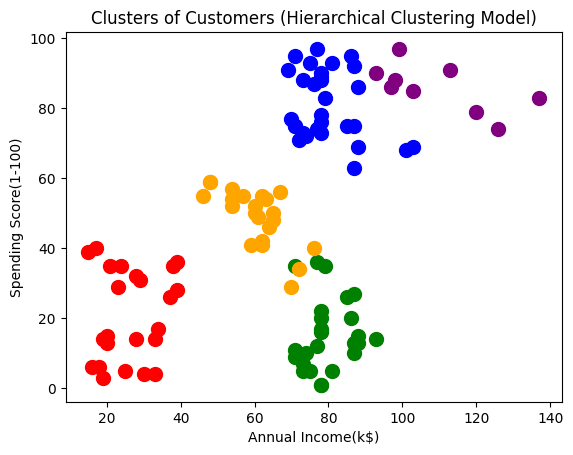

In [58]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean',linkage='ward')
cluster.fit_predict(dataset)

x = df3.iloc[:, [3,4]].values
plt.scatter(x[cluster.fit_predict(dataset)==0, 0], x[cluster.fit_predict(dataset)==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[cluster.fit_predict(dataset)==1, 0], x[cluster.fit_predict(dataset)==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[cluster.fit_predict(dataset)==2, 0], x[cluster.fit_predict(dataset)==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[cluster.fit_predict(dataset)==3, 0], x[cluster.fit_predict(dataset)==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(x[cluster.fit_predict(dataset)==4, 0], x[cluster.fit_predict(dataset)==4, 1], s=100, c='orange', label ='Cluster 5')

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.